<a href="https://www.kaggle.com/code/sonalanand/daily-practise-16-april-map-filter?scriptVersionId=234342921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚗 Daily Pandas Practice – Using `map()` and `filter()`

Today’s focus is on exploring a real-world dataset involving **road safety**, **driving behaviors**, and **insurance costs** across U.S. states. The dataset includes stats like accident causes, total accidents per 100k population, and average insurance premiums.

---

### 🔍 What I’m Practising:
- Applying `map()` to transform or categorise data
- Using `filter()` to focus on specific subsets
- Pairing each transformation with a meaningful Seaborn visualisation

---

### 📋 Dataset Columns:
- `total` → Total fatal accidents per 100k people  
- `speeding`, `alcohol`, `not_distracted`, `no_previous` → % of accidents by cause  
- `ins_premium` → Average insurance premium (USD)  
- `ins_losses` → Average insurance losses (USD)  
- `abbrev` → US state abbreviation

---

### ✅ Questions Covered Today:
1. Use `map()` to classify states by accident severity (high, medium, low) and plot by severity
2. Use `filter()` to select only states with very high insurance losses and compare premiums
3. Use `map()` to assign risk level based on alcohol-related accidents and plot it
4. Use `filter()` to keep only states where speeding is above 6, and plot ins_losses vs speeding
5. Use `map()` to bin `ins_premium` into 3 groups and compare total accidents via boxplot

Let’s start  👇


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('car_crashes')
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


# ✅  Q1: Use map() to classify states by accident severity and plot count by severity level

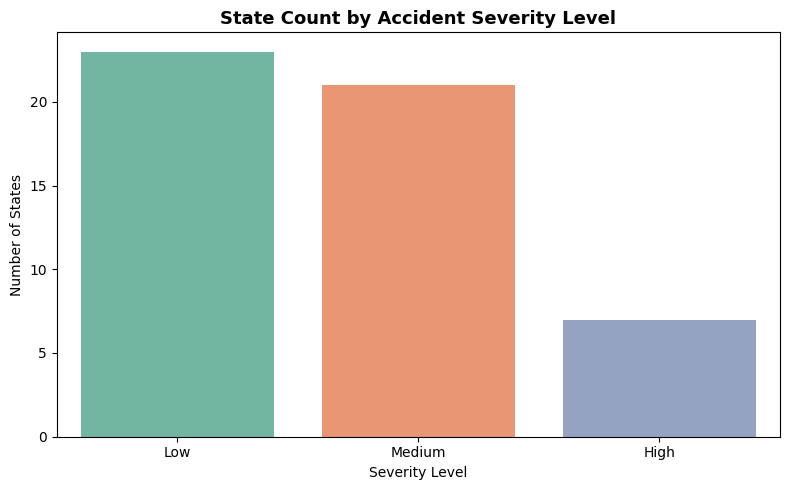

In [2]:

# Step 1: Define severity levels based on 'total' fatalities

def classify_severity(x):
    if x >= 20:
        return 'High'
    elif x >= 15:
        return 'Medium'
    else:
        return 'Low'


df['severity_level'] = df['total'].map(classify_severity)



# Step 2: Plotting count of states per severity level

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='severity_level', order=['Low', 'Medium', 'High'], palette='Set2')

plt.title('State Count by Accident Severity Level', fontsize=13, fontweight='bold')
plt.xlabel('Severity Level')
plt.ylabel('Number of States')



plt.tight_layout()
plt.show()



# ✅ Q2: Use filter() to select states with very high insurance losses and compare their premiums

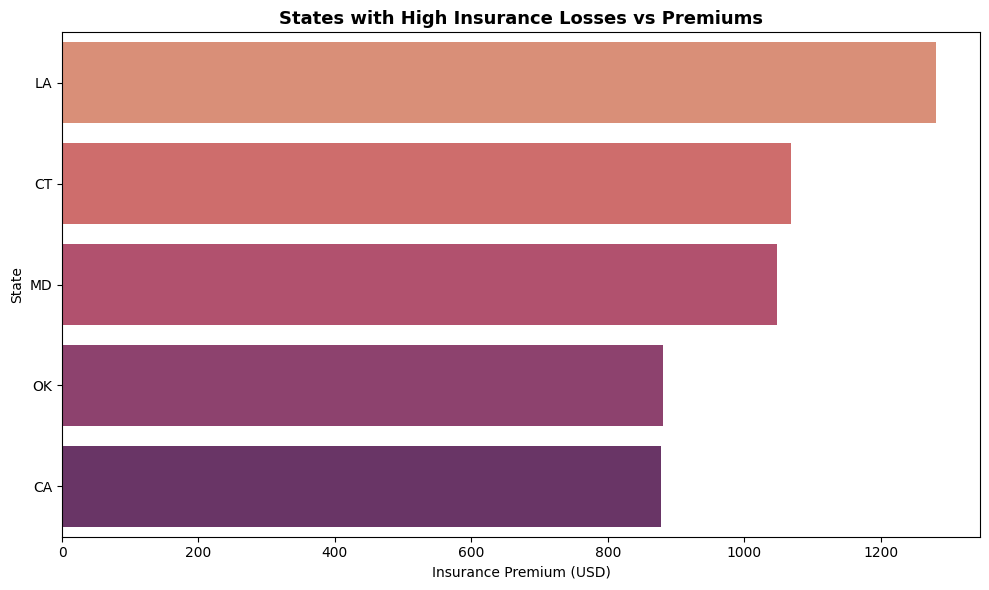

In [3]:


# Step 1: Filter states where insurance losses are greater than 160

high_loss_states = df[df['ins_losses'] > 160]



# Step 2: Plotting premiums of these states


plt.figure(figsize=(10, 6))


sns.barplot(data=high_loss_states.sort_values('ins_premium', ascending=False),
            x='ins_premium', y='abbrev', palette='flare')


plt.title('States with High Insurance Losses vs Premiums', fontsize=13, fontweight='bold')
plt.xlabel('Insurance Premium (USD)')
plt.ylabel('State')


plt.tight_layout()
plt.show()




# ✅ Q3: Use map() to assign risk levels based on alcohol-related accidents and plot it

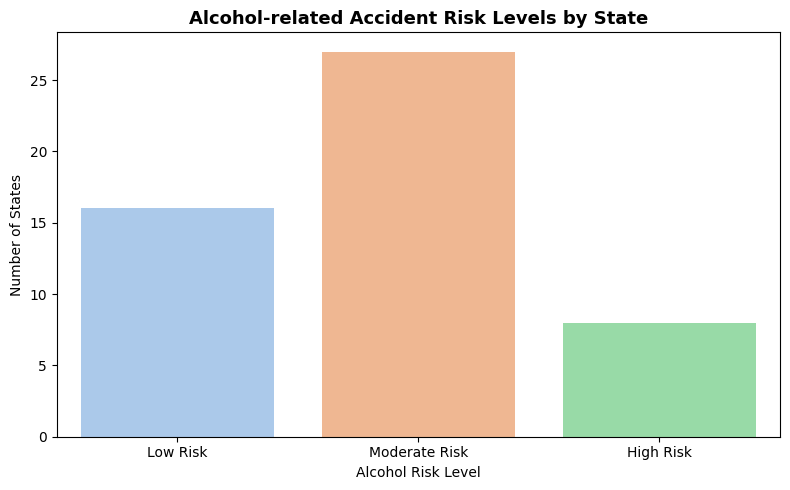

In [4]:


def alcohol_risk(x):
    if x >= 6.0:
        return 'High Risk'
    elif x >= 4.0:
        return 'Moderate Risk'
    else:
        return 'Low Risk'


df['alcohol_risk'] = df['alcohol'].map(alcohol_risk)



# Step 2: Plotting number of states per alcohol risk level

plt.figure(figsize=(8, 5))


sns.countplot(data=df, x='alcohol_risk', order=['Low Risk', 'Moderate Risk', 'High Risk'], palette='pastel')



plt.title('Alcohol-related Accident Risk Levels by State', fontsize=13, fontweight='bold')
plt.xlabel('Alcohol Risk Level')
plt.ylabel('Number of States')



plt.tight_layout()
plt.show()



# ✅ Q4: Use filter() to keep only states where speeding is above 6, and plot ins_losses vs speeding

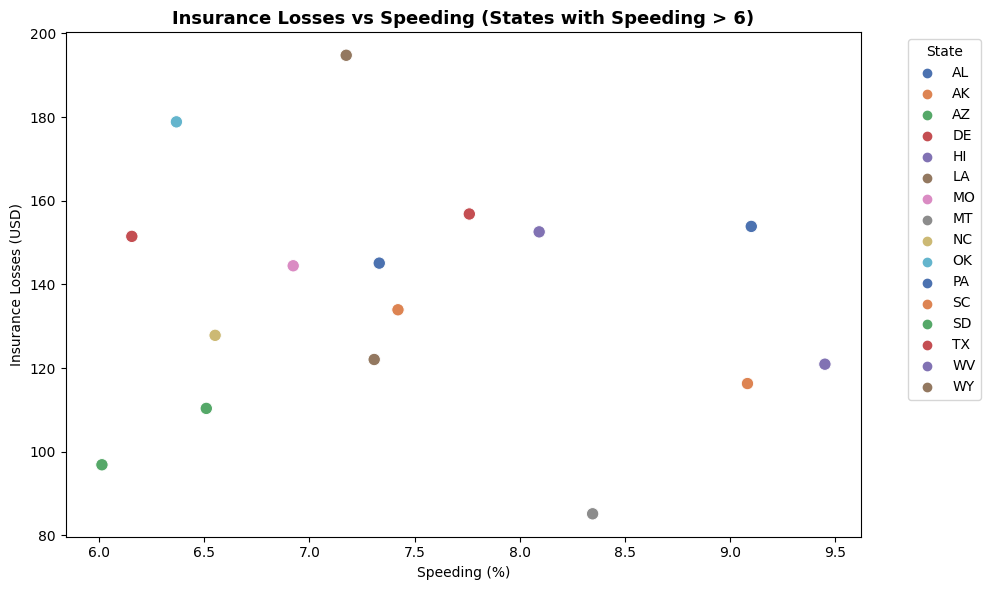

In [5]:



# Step 1: Filter the DataFrame for states with speeding > 6

speeding_states = df[df['speeding'] > 6]



# Step 2: Plotting ins_losses vs speeding

plt.figure(figsize=(10, 6))


sns.scatterplot(data=speeding_states, x='speeding', y='ins_losses', hue='abbrev', palette='deep', s=80)

plt.title('Insurance Losses vs Speeding (States with Speeding > 6)', fontsize=13, fontweight='bold')
plt.xlabel('Speeding (%)')
plt.ylabel('Insurance Losses (USD)')



plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()
plt.show()




# ✅ Q5: Use map() to bin ins_premium into 3 groups and compare total accidents via boxplot

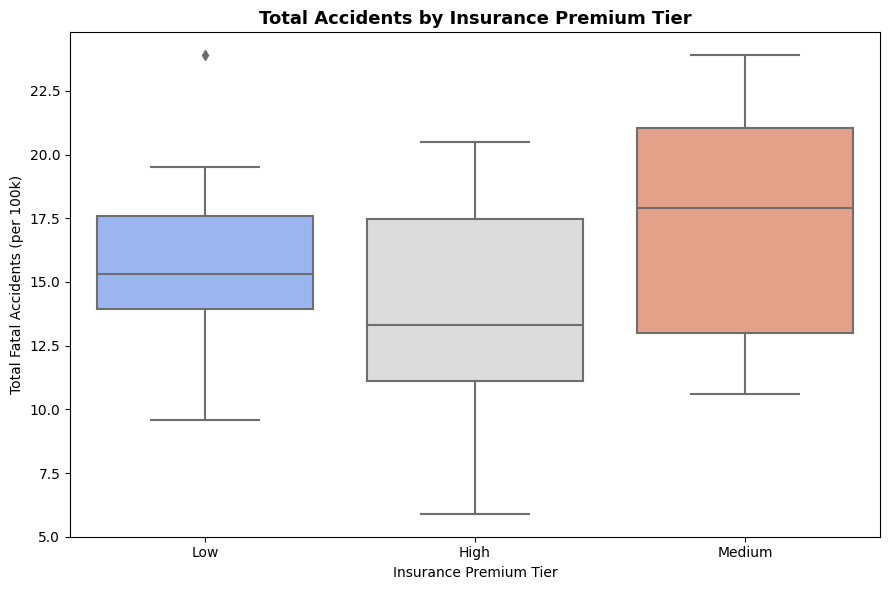

In [6]:
# Step 1: Define premium tiers

def premium_tier(x):
    if x < 800:
        return 'Low'
    elif x < 1000:
        return 'Medium'
    else:
        return 'High'


df['premium_tier'] = df['ins_premium'].map(premium_tier)



# Step 2: Boxplot of total accidents grouped by premium tier

plt.figure(figsize=(9, 6))


sns.boxplot(data=df, x='premium_tier', y='total', palette='coolwarm')

plt.title('Total Accidents by Insurance Premium Tier', fontsize=13, fontweight='bold')
plt.xlabel('Insurance Premium Tier')
plt.ylabel('Total Fatal Accidents (per 100k)')


plt.tight_layout()
plt.show()



In [7]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,severity_level,alcohol_risk,premium_tier
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,Medium,Moderate Risk,Low
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,Medium,Moderate Risk,High
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,Medium,Moderate Risk,Medium
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,High,Moderate Risk,Medium
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,Low,Low Risk,Medium
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,Low,Low Risk,Medium
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Low,Low Risk,High
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,Medium,Moderate Risk,High
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,Low,Low Risk,High
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,Medium,Moderate Risk,High
